<center><img src=https://www.toronto.ca/wp-content/uploads/2023/10/9744-Cycling-Network-graphic-2023-10-31-1024x338.png /></center>

<center><h1>City Bike Planning</h1></center>
<center>Collaborators: Ankith Bachhu, Shaunak Roy, Dominick Cardone, Daniel Lu</center>

## Table of Contents
1. [Introduction](#Introduction) <br> 
2. [Part 1: Data Collection](#Part-1:-Data-Collection) <br>
3. [Part 2: Data Cleaning & Exploratory Analysis](#Part-2:-Data-Cleaning-&-Exploratory-Analysis) <br>
4. [Part 3: Model Training and Testing](#Part-3:-Model-training-and-testing) <br>
5. [Part 4: Interpretation of Results](#Part-4:-Interpretation-of-Results) <br>
6. [Conclusion](#Conclusion) <br>
7. [References](#References)

## Introduction
The purpose of this tutorial is to walk you through the data science lifecycle, introducing you to many different data science concepts. The data science lifecycle goes as follows: 
1. Data collection
3. Data processing
4. Exploratory analysis and Data visualization
5. Model analysis and testing
6. Interpretation of results

The whole purpose of the data science lifecycle is to identify trends or patterns, investigate or answer a question, or solve a problem. In this tutorial, we will be looking to build a model to help us answer the question: ***When and why do people in Washington D.C use electric bikes over normal bikes?*** Although we will not come to an exact answer at the end of this tutorial, building a model can give us insight into an answer in the future. Moreover, by answering this question, we will be able to determine factors which influence the use of electric bikes. These factors could be distance between stations, amount of time biker wants to ride, specific location in the city, etc. 

By determining these factors, we can make necessary changes to distribute our electric bikes accordingly. For example, if based on the model, we can see that people at a certain station always ride electric bikes, we can place more electric bikes in that location while moving normal bikes to other locations, ensuring that people will have their preferred choice of transportation. It also saves money and time for the company, as they do not have to supply locations with both electric and normal bikes. By answering our question in regards to electric bikes, we can answer the same question for normal bikes, and then be able to distribute both types of bikes accordingly. 

A data scientist is always on the lookout for new observations and discoveries in their data, so throughout this tutorial, we will ask questions which you can consider to further explore yourself.

**IMPORTANT** 
1. For this tutorial, please note that an observation refers to one row of the table. In other words, one observation is one recorded bike ride. Each column also corresponds to a feature/attribute of these observations.
2. In only a few portions of the code, there are warning messages, which you can ignore. Please look after the warning message for the intended output of the code.

## Part 1: Data Collection
We must begin by collecting the data necessary to answer our question. It is important to find the appropriate dataset for your situation, as later on, your machine learning model is as good as the data you feed into it. Your model will use the same dataset to derive its own conclusions, so a good dataset would yield more conclusive results.

Usually, a company may have to conduct their own experiments or studies to collect the necessary data they need. However, oftentimes, these tasks are already done by other companies, and avaialble to use for the public. For our tutorial, we will be using a dataset provided by Capital Bike Share.

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/Quantitative-data-collection-methods-1-700x545.png"></center>

### Import Python Libraries
To begin this tutorial, we first need to import the necessary Python libraries (as shown below), which will be used for this tutorial. You should use Jupyter Notebook, as most of the code provided is run in Jupyter Notebook. Jupyter Notebook is also widely used by data scientists, as it allows us to better visualize our data and other analysis. We will dive more in detail about the use of each of these libraries as we encounter and use each one.

In [212]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns

# Filter out the warnings
import warnings
warnings.filterwarnings("ignore")

### Download and import the data
Navigate to the [Capital Bike Share dataset](https://s3.amazonaws.com/capitalbikeshare-data/index.html) and download any of the zip files. Extract the csv file from the zip file, and **make sure you move it to the same folder** as the one in which you are running your python program or Jupyter Notebook. For the purpose of this tutorial, it would be helpful to download the [same zip file](https://s3.amazonaws.com/capitalbikeshare-data/202402-capitalbikeshare-tripdata.zip) we did, if you want to compare your results with the tutorial's.

We used [Pandas DataFrames](https://pandas.pydata.org/about/) to read in this .csv file as Pandas is a very useful tool to help with manipulating and analyzing data tables using Python

In [213]:
# Read in the csv file
df = pd.read_csv(r"202402-capitalbikeshare-tripdata.csv")

### Understanding your Data
If you downloaded the same .csv file, run the code below, and compare your results, it should be the same. Before, you can move onto the next process, you need to have some understanding of the data below. Take some time to look over it, and note that each row (or observation) is recorded information for one bike ride.

In [214]:
# Print out the head of the table imported
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


## Part 2: Data Cleaning & Exploratory Data Analysis
Now that we have our data, the next step is to clean our data. *What does it mean to clean our data?* It is exactly how it sounds, we will need to make changes to our data in order to make it ready to be processed by our machine learning model or just easier for us to analyze. This process may involve many different things, some examples are:
* Deleting unnecessary data
* Filling in missing data
* Changing the values or metrics/measurements of our data
* Calculating new and more convenient features from existing data

Now, you may have noticed we combined two steps of the data science lifecycle: Data cleaning & Exploratory Analysis. We've combined these two steps, because sometimes it is helpful to perform exploratory analysis on our dataset in order to help determine what things we need to clean. For example, we may plot a graph of two features in order to see if there are any noticeable trends. This analysis may prompt us to create a new feature that we may believe to be useful for our machine learning model's predictions.

In simple terms, exploratory analysis, is performing any sort of analysis on your dataset before we pass it into the machine learning model. This process may involve creating graphs comparing features or plotting a certain data point. Essentially, we are trying to get some insight into our dataset before passing it into the machine learning model, making any predictions or identifying any trends, which may help interpreting our results. This analysis may also help guide our question or research, as mentioned earlier, where we may notice one feature is significant in some sort of way.

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/data-collection-methods-700x545.png"></center>

First let's list out some information about each column (aka our features).

In [216]:
# List out information about each of the features of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318688 entries, 0 to 318687
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             318688 non-null  object 
 1   rideable_type       318688 non-null  object 
 2   started_at          318688 non-null  object 
 3   ended_at            318688 non-null  object 
 4   start_station_name  270637 non-null  object 
 5   start_station_id    270637 non-null  float64
 6   end_station_name    267827 non-null  object 
 7   end_station_id      267824 non-null  float64
 8   start_lat           318688 non-null  float64
 9   start_lng           318688 non-null  float64
 10  end_lat             318444 non-null  float64
 11  end_lng             318444 non-null  float64
 12  member_casual       318688 non-null  object 
dtypes: float64(6), object(7)
memory usage: 31.6+ MB


As we notice, there is a lot of inconsistencies with how many non-null values exist for each feature column. Along with that, we notice that a lot of features are represented by an object data type, which corresponds to a string value; however, features like *started_at* and *ended_at* might be more useful for computation as a datetime column.

### Drop Some Unnecessary Data
To start our cleaning process, let's drop some unnecessary data. *How did we determine that this data was unnecessary?* We dropped the IDs because they are random and essentially function the same as indexes, providing no meaningful information.

In [217]:
# Drop start and end station id columns
df.drop(["start_station_id", "end_station_id"], axis=1, inplace=True)

# Drop ride id column
df.drop(["ride_id"], axis=1, inplace=True)

In [218]:
# List out info of columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318688 entries, 0 to 318687
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       318688 non-null  object 
 1   started_at          318688 non-null  object 
 2   ended_at            318688 non-null  object 
 3   start_station_name  270637 non-null  object 
 4   end_station_name    267827 non-null  object 
 5   start_lat           318688 non-null  float64
 6   start_lng           318688 non-null  float64
 7   end_lat             318444 non-null  float64
 8   end_lng             318444 non-null  float64
 9   member_casual       318688 non-null  object 
dtypes: float64(4), object(6)
memory usage: 24.3+ MB


Let's drop some of the observations which contain missing entries. This step is important, as having observations with missing entries may lead to errors when running code later. Since our machine learning model relies on data points to make predictions, a data point containing no value could interefere with our predictions. Our dataset has 300k+ observations, so it is large enough and the amount of missing data is small enough that we can safely ignore it without hindering our predictions.

In [219]:
# Drop any observations, where there are missing entries or data points
df.dropna(axis=0, inplace=True)

In [220]:
# List out info of columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246639 entries, 0 to 318687
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       246639 non-null  object 
 1   started_at          246639 non-null  object 
 2   ended_at            246639 non-null  object 
 3   start_station_name  246639 non-null  object 
 4   end_station_name    246639 non-null  object 
 5   start_lat           246639 non-null  float64
 6   start_lng           246639 non-null  float64
 7   end_lat             246639 non-null  float64
 8   end_lng             246639 non-null  float64
 9   member_casual       246639 non-null  object 
dtypes: float64(4), object(6)
memory usage: 20.7+ MB


In [221]:
# Print out table again to check it
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
16,electric_bike,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
17,classic_bike,2024-02-07 17:42:09,2024-02-07 18:12:20,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
18,classic_bike,2024-02-22 16:43:35,2024-02-22 16:56:25,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
19,classic_bike,2024-02-10 01:11:14,2024-02-10 01:23:52,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


This step is more specific for Pandas DataFrames, but nonetheless important. It resets our indices to be in order from 0, 1, ..., some integer. As we can see above, the indices are scattered, skipping from 0 to 16. These unordered indices may make it inconvenient to perform other data cleaning later on, as well as cause potential errors.

In [222]:
# Reset indices of table and print out table again to check it
df.reset_index(drop=True, inplace=True)
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
1,electric_bike,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
2,classic_bike,2024-02-07 17:42:09,2024-02-07 18:12:20,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
3,classic_bike,2024-02-22 16:43:35,2024-02-22 16:56:25,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
4,classic_bike,2024-02-10 01:11:14,2024-02-10 01:23:52,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


Next, let's convert the data types of our data points. Specifically in this case, we are converting our strings to be datetime objects, as converting it to datetime objects will allow us to perform necessary operations or arithmetic later.

In [223]:
# Convert datatypes to datetime objects
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# List out columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246639 entries, 0 to 246638
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       246639 non-null  object        
 1   started_at          246639 non-null  datetime64[ns]
 2   ended_at            246639 non-null  datetime64[ns]
 3   start_station_name  246639 non-null  object        
 4   end_station_name    246639 non-null  object        
 5   start_lat           246639 non-null  float64       
 6   start_lng           246639 non-null  float64       
 7   end_lat             246639 non-null  float64       
 8   end_lng             246639 non-null  float64       
 9   member_casual       246639 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 18.8+ MB


In [224]:
# Print out top of table to check
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
1,electric_bike,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
2,classic_bike,2024-02-07 17:42:09,2024-02-07 18:12:20,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
3,classic_bike,2024-02-22 16:43:35,2024-02-22 16:56:25,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
4,classic_bike,2024-02-10 01:11:14,2024-02-10 01:23:52,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


Let's perform some arithemtic with our datetime objects we converted earlier. We are subtracting the start and end times, in order to calculate a new feature, which is the duration of the bike ride. We then need to convert it into total number of minutes.

In [225]:
# Create new column time duration in minutes
df["time_duration"] = (df["ended_at"] - df["started_at"]).dt.total_seconds()/60

# Print out top of table to check again
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,time_duration
0,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member,8.766667
1,electric_bike,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member,12.883333
2,classic_bike,2024-02-07 17:42:09,2024-02-07 18:12:20,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member,30.183333
3,classic_bike,2024-02-22 16:43:35,2024-02-22 16:56:25,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member,12.833333
4,classic_bike,2024-02-10 01:11:14,2024-02-10 01:23:52,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual,12.633333


In [226]:
# List out column infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246639 entries, 0 to 246638
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       246639 non-null  object        
 1   started_at          246639 non-null  datetime64[ns]
 2   ended_at            246639 non-null  datetime64[ns]
 3   start_station_name  246639 non-null  object        
 4   end_station_name    246639 non-null  object        
 5   start_lat           246639 non-null  float64       
 6   start_lng           246639 non-null  float64       
 7   end_lat             246639 non-null  float64       
 8   end_lng             246639 non-null  float64       
 9   member_casual       246639 non-null  object        
 10  time_duration       246639 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 20.7+ MB


### Some Exploratory Analysis #1
Let's conduct some exploratory analysis by creating a countplot for the type of bike: electric or regular. Since we're using the type of bike ridden in a trip as our dependent variable, we want to check for any skew in the frequency of each class. If there is a significant imbalance in classes, we would take a subsample of the excess class to match the number of the smaller class.

We used [Seaborn](https://seaborn.pydata.org/) (imported as sns) because it is a very useful tool for data visualization when coding in Python.

Text(0, 0.5, 'Count')

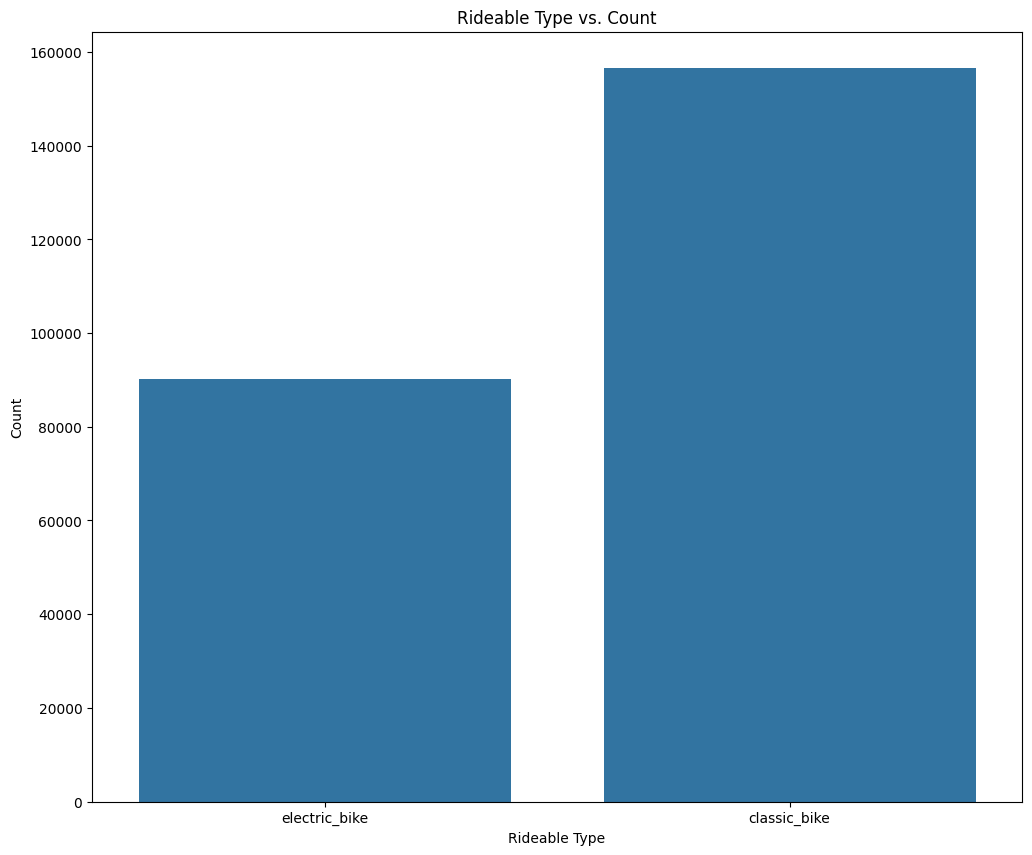

In [227]:
# Create a countplot for the type of bikes
plt.figure(figsize=(12,10))
sns.countplot(x=df["rideable_type"])
plt.title('Rideable Type vs. Count')
plt.xlabel('Rideable Type')
plt.ylabel('Count')

In this case the balance between classic bike and electric bike is around 2:1 (slightly imbalanced resample). Because there is an imbalance, let us take a subset of the classic bike observations so that there are exactly 50% classic bikes and electric bikes each.

In [228]:
df["rideable_type"].value_counts()

rideable_type
classic_bike     156535
electric_bike     90104
Name: count, dtype: int64

In [229]:
electric_bike_sample = df[df["rideable_type"] == "electric_bike"]
# Take a random sample of classic bikes such that you get the same number of electric and classic bikes
classic_bike_sample = df[df["rideable_type"] == "classic_bike"].sample(n=len(electric_bike_sample), random_state=42)

# Concatenate the electric bike sample and the sampled classic bikes to create the balanced DataFrame
balanced_df = pd.concat([electric_bike_sample, classic_bike_sample])

balanced_df.reset_index(drop=True, inplace=True)

In [230]:
balanced_df["rideable_type"].value_counts()

rideable_type
electric_bike    90104
classic_bike     90104
Name: count, dtype: int64

Text(0, 0.5, 'Count')

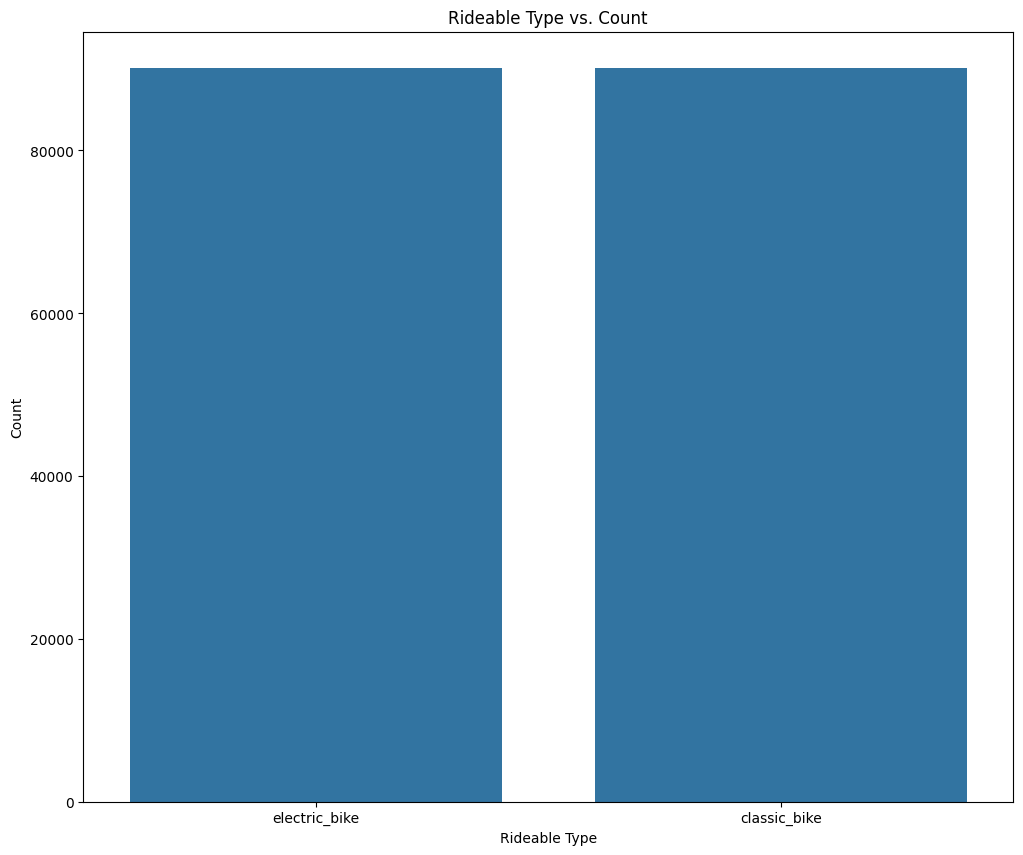

In [231]:
plt.figure(figsize=(12,10))
sns.countplot(x=balanced_df["rideable_type"])
plt.title('Rideable Type vs. Count')
plt.xlabel('Rideable Type')
plt.ylabel('Count')

Now the counts for both the types of bikes are balanced at a value of 90,104.

In [232]:
# Reassign balanced_df to df for ease of coding (unnecessary because you
# no longer have the original dataset but less variables to keep track of).
df = balanced_df

### One Hot Encoding
One-hot encoding is an essential technique for data scientists, used to convert multiclass categorical data into integer representations. For binary classification, we typically represent one class as 0 and the other as 1. However, for multi-class scenarios, we break the data into multiple columns, each representing a class. Importantly, we only need \(n-1\) columns for \(n\) classes. This is because if all the other columns are 0, we can infer that the remaining class must be 1. Essentially, one class is dependent on the others.

Many people might initially think that we can simply use 1 for one class, 2 for the next class, 3 for the following class, and so on. However, this approach can bias our machine learning algorithms, as it may inadvertently assign more importance to higher numerical values. Instead, we use one-hot encoding to avoid this issue. For example, with four classes, one-hot encoding would represent them as (1,0,0,0), (0,1,0,0), (0,0,1,0), and (0,0,0,1). This way, each class is treated equally, and no unintended hierarchical relationship is introduced. We can drop one of the columns listed to reduce the number of features.

In [233]:
# Create one hot encodings for the rideable_type and member_casual
df = pd.get_dummies(df, columns=['rideable_type', 'member_casual'], drop_first=True)

# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member
0,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,8.766667,True,True
1,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,12.883333,True,True
2,2024-02-28 11:54:56,2024-02-28 12:01:46,North Capitol St & F St NW,13th & E St SE,38.897363,-77.009814,38.882915,-76.987907,6.833333,True,False
3,2024-02-25 15:56:24,2024-02-25 16:03:05,Harvard St & Adams Mill Rd NW,Georgia Ave & Morton St NW,38.927858,-77.043285,38.932128,-77.023500,6.683333,True,True
4,2024-02-09 23:51:15,2024-02-10 00:05:19,Virginia Ave & 25th St NW,Maine Ave & 9th St SW,38.898504,-77.052997,38.880440,-77.025236,14.066667,True,False


Let's perform some arithmetic using some of the data we already have. More specifically, we are calculating a new feature, the distance for each ride. In order to accomplish this task, we are using the Haversine Distance formula, which allows us to calculate the distance between two ponts given their latitudinal and longitudinal coordinates. This is really helpful in the real world, as we live on a spherical ball, so euclidian distance gives us an inaccurate measure of the distance around the Earth between these points. Note that this still does not account for any elevation changes between places, so there will be discrepancies in the actual distance.

In [234]:
# Create function for Haversine Distance formula
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points given their latitude and longitude coordinates.
    """
    R = 6371  # Radius of the Earth in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    
    return distance

In [235]:
# Create new distance column calculating the haversine distance for each observation
df['distance_km'] = haversine_distance(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])

# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km
0,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,8.766667,True,True,1.493573
1,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,12.883333,True,True,3.321546
2,2024-02-28 11:54:56,2024-02-28 12:01:46,North Capitol St & F St NW,13th & E St SE,38.897363,-77.009814,38.882915,-76.987907,6.833333,True,False,2.485125
3,2024-02-25 15:56:24,2024-02-25 16:03:05,Harvard St & Adams Mill Rd NW,Georgia Ave & Morton St NW,38.927858,-77.043285,38.932128,-77.023500,6.683333,True,True,1.776064
4,2024-02-09 23:51:15,2024-02-10 00:05:19,Virginia Ave & 25th St NW,Maine Ave & 9th St SW,38.898504,-77.052997,38.880440,-77.025236,14.066667,True,False,3.131704


Let's calculate another new feature. In this case, we are calculating average speed, *how could this be useful?* We believe this may be another metric which could give us valuable insight for our data.

In [236]:
# Calculate new column average speed
df["average_speed"] = df["distance_km"] / df["time_duration"] * 60

# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,8.766667,True,True,1.493573,10.222169
1,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,12.883333,True,True,3.321546,15.469038
2,2024-02-28 11:54:56,2024-02-28 12:01:46,North Capitol St & F St NW,13th & E St SE,38.897363,-77.009814,38.882915,-76.987907,6.833333,True,False,2.485125,21.820613
3,2024-02-25 15:56:24,2024-02-25 16:03:05,Harvard St & Adams Mill Rd NW,Georgia Ave & Morton St NW,38.927858,-77.043285,38.932128,-77.023500,6.683333,True,True,1.776064,15.944716
4,2024-02-09 23:51:15,2024-02-10 00:05:19,Virginia Ave & 25th St NW,Maine Ave & 9th St SW,38.898504,-77.052997,38.880440,-77.025236,14.066667,True,False,3.131704,13.357978


### Some Exploratory Analysis #2
Now, let's perform some exploratory analysis. We are trying to see the frequency of observations, which fall within the variety of time durations. Notice, that we used a histogram. A histogram is useful in identifying any outliers in our data, as it shows the distribution of our data (how it differs according to a variable). As we can see from the graph, we know that a large majority of the data points lie below 200 minutes. Therefore, we have the choice of removing any data points above 200 minutes, as they may be outliers.

Text(0, 0.5, 'Count')

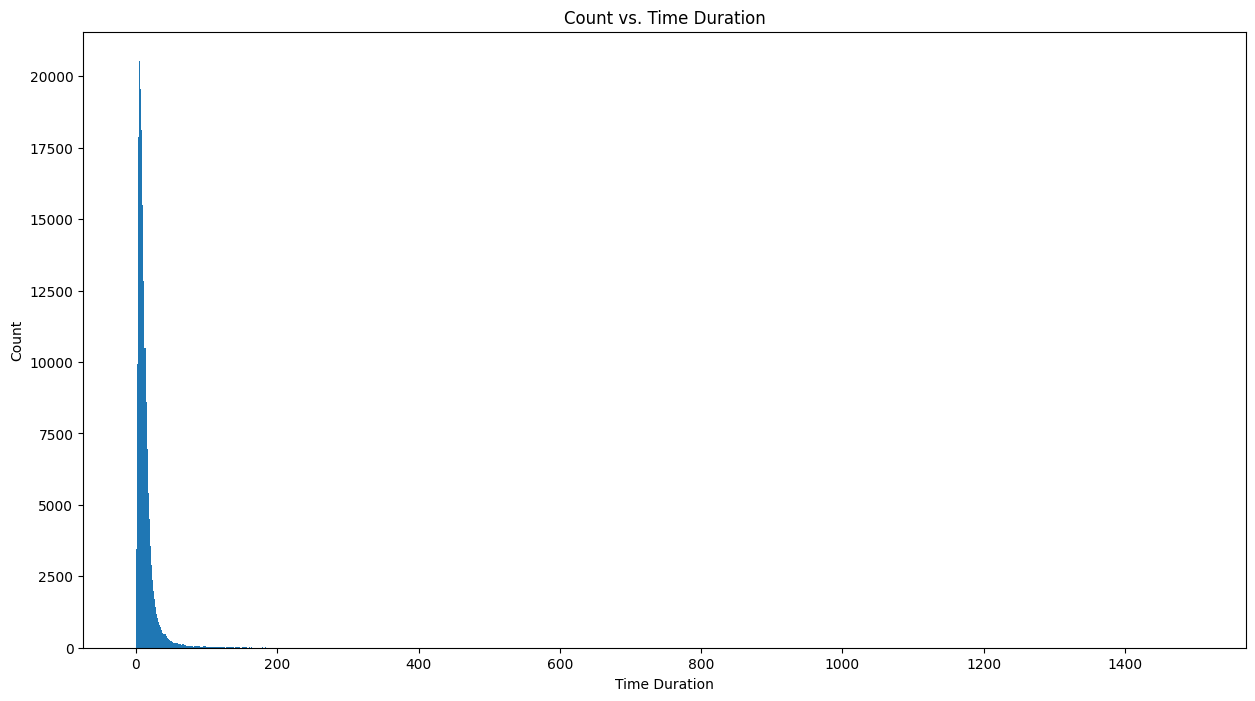

In [237]:
# Plot a histogram of time duration
plt.figure(figsize=(15,8))
plt.hist(df["time_duration"], bins=1000)
plt.title('Count vs. Time Duration')
plt.xlabel('Time Duration')
plt.ylabel('Count')

Next, let's drop some unreasonable data points. In this code, we'll drop any time durations equal to 0 minutes, as such a bike ride was not a complete trip. *What might this do to our data?*

In [238]:
# List out columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180208 entries, 0 to 180207
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   started_at                   180208 non-null  datetime64[ns]
 1   ended_at                     180208 non-null  datetime64[ns]
 2   start_station_name           180208 non-null  object        
 3   end_station_name             180208 non-null  object        
 4   start_lat                    180208 non-null  float64       
 5   start_lng                    180208 non-null  float64       
 6   end_lat                      180208 non-null  float64       
 7   end_lng                      180208 non-null  float64       
 8   time_duration                180208 non-null  float64       
 9   rideable_type_electric_bike  180208 non-null  bool          
 10  member_casual_member         180208 non-null  bool          
 11  distance_km               

In [239]:
# Drop time durations under 0 minutes, too short
df.drop(df[df["time_duration"] <= 0].index, axis = 0, inplace=True)

# Print top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,8.766667,True,True,1.493573,10.222169
1,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,12.883333,True,True,3.321546,15.469038
2,2024-02-28 11:54:56,2024-02-28 12:01:46,North Capitol St & F St NW,13th & E St SE,38.897363,-77.009814,38.882915,-76.987907,6.833333,True,False,2.485125,21.820613
3,2024-02-25 15:56:24,2024-02-25 16:03:05,Harvard St & Adams Mill Rd NW,Georgia Ave & Morton St NW,38.927858,-77.043285,38.932128,-77.023500,6.683333,True,True,1.776064,15.944716
4,2024-02-09 23:51:15,2024-02-10 00:05:19,Virginia Ave & 25th St NW,Maine Ave & 9th St SW,38.898504,-77.052997,38.880440,-77.025236,14.066667,True,False,3.131704,13.357978


In [240]:
# List out columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180187 entries, 0 to 180207
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   started_at                   180187 non-null  datetime64[ns]
 1   ended_at                     180187 non-null  datetime64[ns]
 2   start_station_name           180187 non-null  object        
 3   end_station_name             180187 non-null  object        
 4   start_lat                    180187 non-null  float64       
 5   start_lng                    180187 non-null  float64       
 6   end_lat                      180187 non-null  float64       
 7   end_lng                      180187 non-null  float64       
 8   time_duration                180187 non-null  float64       
 9   rideable_type_electric_bike  180187 non-null  bool          
 10  member_casual_member         180187 non-null  bool          
 11  distance_km                  18

### Some Exploratory Analysis #3
Let's perform some more exploratory analysis. From outputting our data table early on, did you notice some peculiar data points, specifically for our 'time duration' and 'average speed' data points? 

Some of the values seemed a little too unrealistic, for example, a person was riding for a total of 1400 minutes, which is about 24 hours??? On the other hand for average speed, some people were traveling at 250 km/hr???

Sometimes, unrealistic data points may have been a result of an error or mistake in the data collection phase. Therefore, it is important to identify these points, and eliminate any points, which may seem incorrect. The graph below serves to compare these potential outliers, and identify any other ones. Since we our average speed was calculated based on time duration, we plot these two variables, in order to ensure the relationship between them makes sense. *What do you notice about the graph below?*

Text(0, 0.5, 'Average Speed')

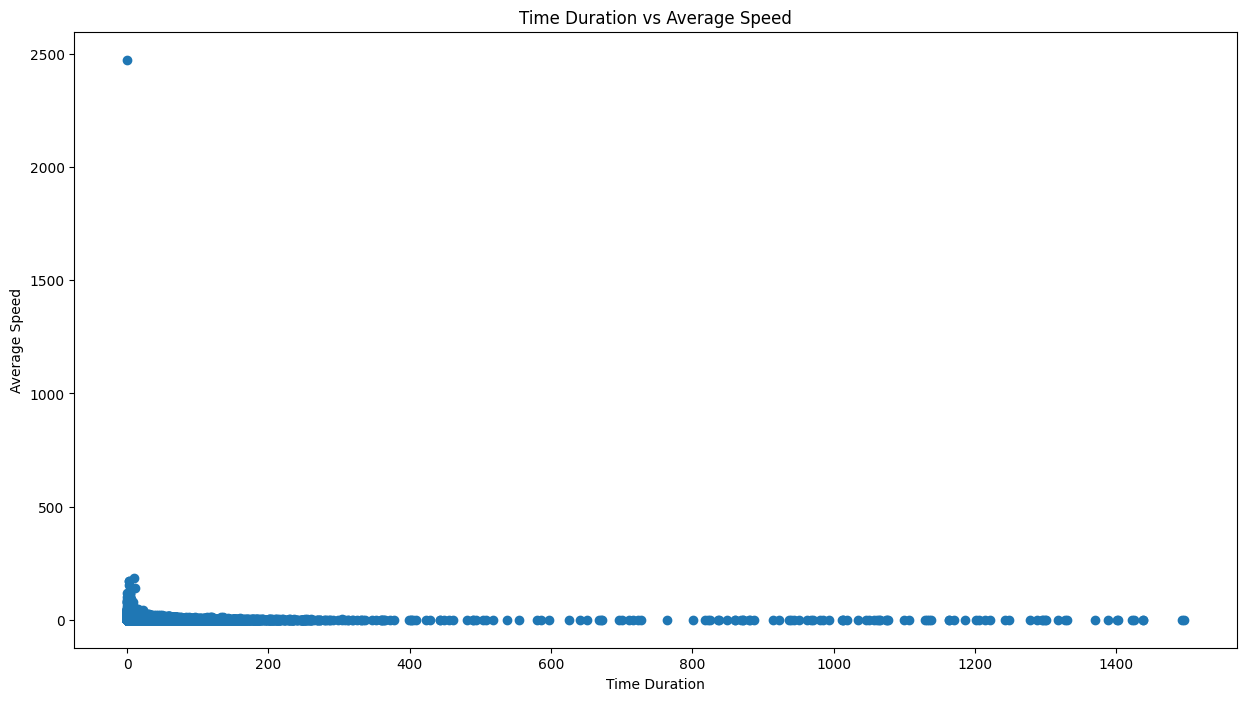

In [241]:
# Create scatter plot for average speed vs time duration
plt.figure(figsize=(15,8))
plt.scatter(df["time_duration"], df["average_speed"])
plt.title("Time Duration vs Average Speed")
plt.xlabel("Time Duration")
plt.ylabel("Average Speed")

In [242]:
# print the median average speed
df['average_speed'].median()

10.860967933873553

After examining the graph, do you notice anything noteworthy? If you look closely, you'll see that most of the average speeds are below approximately 35 km/hr, with a median of 10 km/hr. This suggests that 35 km/hr is a good upper threshold for valid data. Therefore, let's include only the data points with speeds below this threshold. Additionally, let's sort our observations by these values to easily identify the minimum and maximum average speeds.

Note: We are creating a new dataframe so that we don't change any of the values in our original dataframe.

In [243]:
# Check values have been deleted
print("Number of observations before deletion:", len(df))

# Keep observations with average speed below 35, and sort them
filtered_df = df[df['average_speed'] <= 35].sort_values(by='average_speed')
filtered_df.reset_index(drop=True, inplace=True)

# Check values have been deleted
print("Number of observations after deletion:", len(filtered_df))

# Check to see that max values have speed <= 35
filtered_df.tail()

Number of observations before deletion: 180187
Number of observations after deletion: 180116


,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
180111,2024-02-01 15:36:28,2024-02-01 15:47:45,Columbia Rd & Georgia Ave NW,4th & Florida Ave NE,38.963685,-77.010268,38.907316,-77.000698,11.283333,True,False,6.322328,33.619471
180112,2024-02-10 17:21:29,2024-02-10 17:33:28,Court House Metro / 15th St & N Uhle St,Rosslyn Metro / Wilson Blvd & N Moore St,38.896065,-76.992959,38.896087,-77.071452,11.983333,True,True,6.792911,34.011792
180113,2024-02-18 15:09:11,2024-02-18 15:09:14,N Pershing Dr & N Wayne St,N Pershing Dr & N Wayne St,38.880690,-77.086288,38.880705,-77.085960,0.050000,True,True,0.028477,34.172206
180114,2024-02-02 19:42:27,2024-02-02 19:42:28,9th & Upshur St NW,9th & Upshur St NW,38.941718,-77.025130,38.941800,-77.025100,0.016667,True,True,0.009539,34.341591
180115,2024-02-15 17:06:06,2024-02-15 17:21:37,Thomas Jefferson St NW & Water/K St NW,Wilson Blvd & N Edgewood St,38.900233,-76.989405,38.889396,-77.091862,15.516667,True,True,8.948462,34.602001


Now, we will eliminate some more data points, in which seem unreaasonable. First, let's get rid of any bike rides where the start and end destination were the exact same. It is most likely these individuals barely moved, therefore, leading to inaccurate data. 

In [244]:
# Drop same start and end stations
filtered_df.drop(filtered_df[filtered_df["start_station_name"] == filtered_df["end_station_name"]].index, inplace=True)
filtered_df.reset_index(drop=True, inplace=True)

# Check values have been deleted
print("Number of observations:", len(filtered_df))

Number of observations: 173361


Now, let's drop data points, where an individual was traveling below 0.2 km, as this only 200 meters. Some of the fastest people in the world run this distance in less than 20 seconds. Therefore, this bike ride would be incredibly short.

In [245]:
# Drop observations with distance under 0.2 km
filtered_df.drop(filtered_df[filtered_df["distance_km"] <= .2].index, inplace=True)
filtered_df.reset_index(drop=True, inplace=True)

# Check values have been deleted
print("Number of observations:", len(filtered_df))

# Check that df has no values for distance <= 0.2 km
filtered_df.sort_values(by='distance_km').head()

Number of observations: 172568


,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
12559,2024-02-10 07:11:23,2024-02-10 07:13:39,Rhode Island Ave Metro,MBT & Bryant St NE,38.920606,-76.995917,38.922404,-76.996023,2.266667,True,False,0.200085,5.296356
33429,2024-02-27 18:33:58,2024-02-27 18:35:29,18th St & Pennsylvania Ave NW,19th & G St NW,38.899680,-77.041539,38.898412,-77.043182,1.516667,False,True,0.200238,7.921505
23345,2024-02-07 18:01:10,2024-02-07 18:02:53,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,1.716667,False,True,0.200238,6.998611
83795,2024-02-05 20:24:15,2024-02-05 20:25:21,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,1.100000,False,True,0.200238,10.922075
94,2024-02-29 12:48:19,2024-02-29 14:23:17,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,94.966667,False,False,0.200238,0.126511


Now, let's drop data points, where the time spent riding the bike was greater than 300 minutes. Sometimes, data scientists will eliminate data points based on personal intuition, rather than relying on research. It is usually safer to rely on research or logic to back up your actions. However, for the purpose of this tutorial, we can agree that riding on a bike for more than 5 hours may be too long/unreasonable.

In [246]:
# Drop time durations longer than 300 minutes
filtered_df.drop(filtered_df[filtered_df["time_duration"] >= 300].index, inplace=True)
filtered_df.reset_index(drop=True, inplace=True)

# Check values have been deleted
print("Number of observations:", len(filtered_df))

# Check that df has no values for distance > 300 minutes
filtered_df.sort_values(by='time_duration').tail()

Number of observations: 172459


,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
42,2024-02-19 14:57:03,2024-02-19 19:38:50,Calvert St & Woodley Pl NW,Columbia Rd & Belmont St NW,38.923583,-77.050046,38.920669,-77.043680,281.783333,False,False,0.638971,0.136056
560,2024-02-15 10:14:11,2024-02-15 14:57:46,Connecticut Ave & R St NW,19th St & Constitution Ave NW,38.912644,-77.045640,38.892212,-77.043074,283.583333,False,False,2.282718,0.482973
0,2024-02-25 19:14:16,2024-02-26 00:00:50,14th & V St NW,13th & U St NW,38.917709,-77.031844,38.916936,-77.029631,286.566667,True,False,0.209854,0.043938
32,2024-02-13 17:11:44,2024-02-13 22:02:33,37th & O St NW / Georgetown University,Potomac & M St NW,38.907864,-77.071668,38.905509,-77.065246,290.816667,True,True,0.614249,0.126729
1,2024-02-10 13:55:29,2024-02-10 18:53:54,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.416667,False,False,0.282017,0.056703


In [247]:
# print the filtered df after modifications
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-25 19:14:16,2024-02-26 00:00:50,14th & V St NW,13th & U St NW,38.917709,-77.031844,38.916936,-77.029631,286.566667,True,False,0.209854,0.043938
1,2024-02-10 13:55:29,2024-02-10 18:53:54,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.416667,False,False,0.282017,0.056703
2,2024-02-26 09:58:42,2024-02-26 14:27:35,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,268.883333,False,False,0.314635,0.070209
3,2024-02-03 21:26:55,2024-02-04 00:21:16,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,174.350000,True,False,0.214356,0.073768
4,2024-02-16 15:38:29,2024-02-16 18:12:20,22nd & I St NW / Foggy Bottom,New Hampshire Ave & 24th St NW,38.900880,-77.048911,38.901755,-77.051084,153.850000,False,False,0.211721,0.082569


### Some Exploratory Analysis #4
Let's perform some more exploratory analysis. Let's plot the distance traveled vs the average speed. *Why do you think we are doing this?* Again, we are trying to see if we can notice anything interesting. If something catches our eye, we may have to adjust our data, eliminate data, etc. From this graph, we can see most of the data points appear to be reasonable.

Text(0, 0.5, 'Average speed (kph)')

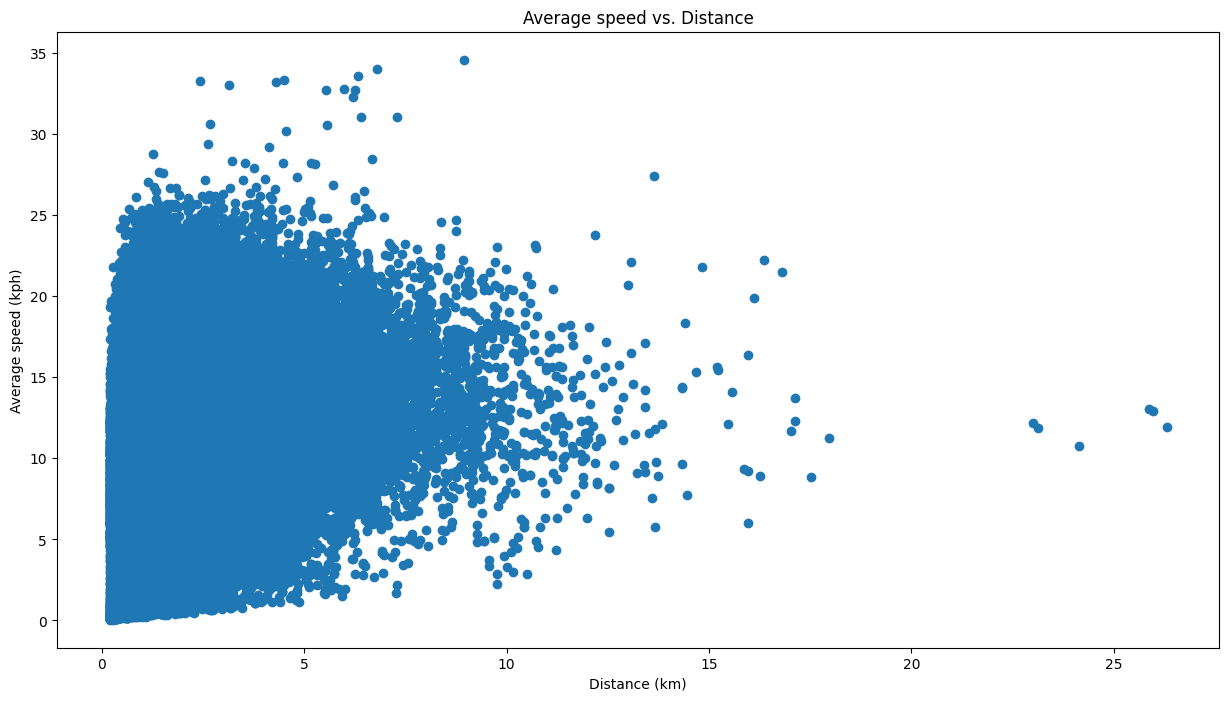

In [248]:
# Create scatter plot for average speed vs distance
plt.figure(figsize=(15,8))
plt.scatter(filtered_df["distance_km"], filtered_df["average_speed"])
plt.title('Average speed vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Average speed (kph)')

After getting rid of the abnormally high values for speeds and distances, the plot above shows more reasonable data points. For example, there are no outliers that demonstrate that a person is biking at 140 kph now.

### Some Exploratory Analysis #5
Let's perform some more exploratory analysis. This time, let's do something similar, but instead plot the time duration vs the average speed. *Why do you think we are doing this?* If you remember, we already plotted this same graph before. However, this time it is after we eliminated some data points. Therefore, we are checking to see if the graph seems reasonable. 

Text(0.5, 1.0, 'Time Duration vs Average Speed')

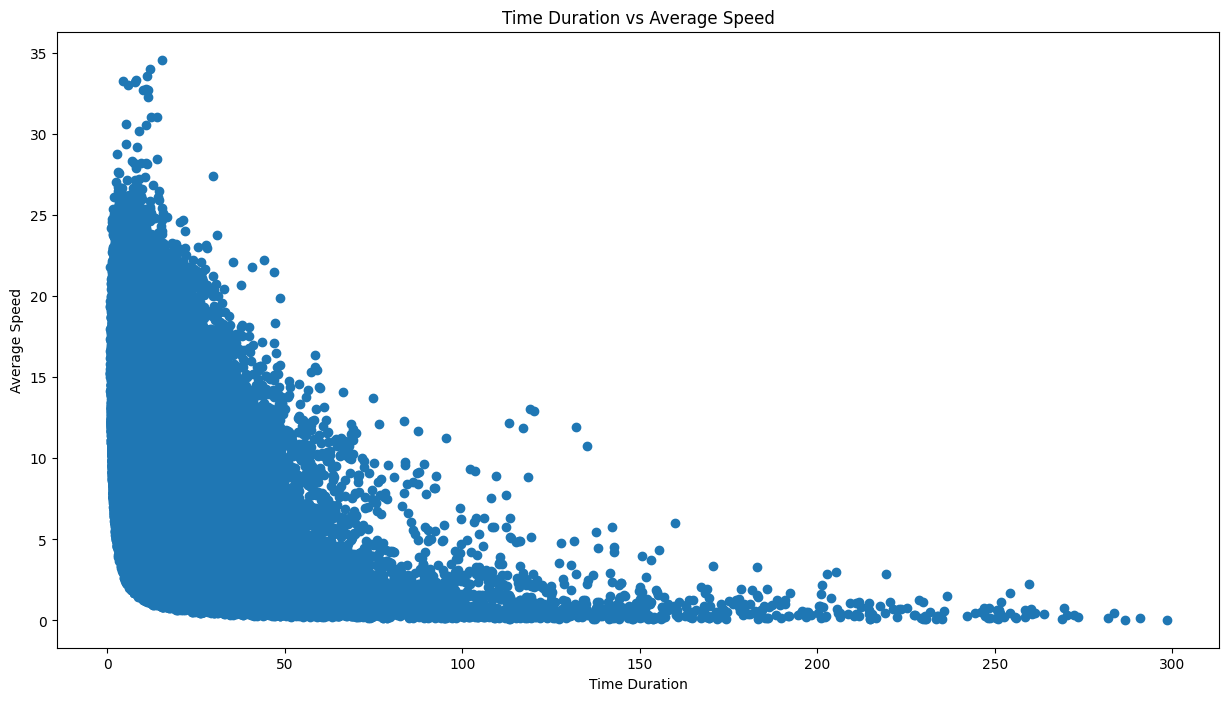

In [249]:
# Plot scatter plot for average speed vs time duration
plt.figure(figsize=(15,8))
plt.scatter(filtered_df["time_duration"], filtered_df["average_speed"])
plt.xlabel("Time Duration")
plt.ylabel("Average Speed")
plt.title("Time Duration vs Average Speed")

The plot makes sense because people would tend to bike at slower speeds over longer distances, so the inverse correlation of the two features is as expected. The higher average speeds are for really short bike rides, so they probably accelerated really quickly for this time or biked downhill, which are both reasonable conclusions to draw from these data points.

Let's sort the values of our distance traveled to once again better view the minimum and maxiumum value of our distance traveled data point. 

In [250]:
# Sort observations by distances
filtered_df.sort_values(by='distance_km')

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
12450,2024-02-10 07:11:23,2024-02-10 07:13:39,Rhode Island Ave Metro,MBT & Bryant St NE,38.920606,-76.995917,38.922404,-76.996023,2.266667,True,False,0.200085,5.296356
31,2024-02-29 12:48:19,2024-02-29 14:23:17,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,94.966667,False,False,0.200238,0.126511
33320,2024-02-27 18:33:58,2024-02-27 18:35:29,18th St & Pennsylvania Ave NW,19th & G St NW,38.899680,-77.041539,38.898412,-77.043182,1.516667,False,True,0.200238,7.921505
83686,2024-02-05 20:24:15,2024-02-05 20:25:21,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,1.100000,False,True,0.200238,10.922075
92990,2024-02-05 20:27:41,2024-02-05 20:28:44,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,1.050000,False,True,0.200238,11.442173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100154,2024-02-18 15:02:34,2024-02-18 16:59:36,Wiehle-Reston Metro South,N Pershing Dr & N Wayne St,38.946638,-77.339438,38.880705,-77.085960,117.033333,True,True,23.123920,11.855043
80214,2024-02-04 09:55:24,2024-02-04 12:10:24,S Four Mile Run Dr & Walter Reed Dr,W&OD Trail/Sunset Hills Rd & Isaac Newton Sq,38.847360,-77.095431,38.951443,-77.340377,135.000000,False,True,24.150733,10.733659
119246,2024-02-03 09:58:54,2024-02-03 11:57:54,Reston Town Center Metro North,34th & Water St NW,38.953618,-77.359698,38.903731,-77.067528,119.000000,True,False,25.874758,13.046097
117897,2024-02-24 07:15:11,2024-02-24 09:15:29,North Shore & Cameron Crescent Dr/Crescent Apa...,Harvard St & Adams Mill Rd NW,38.970145,-77.338663,38.927872,-77.043358,120.300000,True,False,25.966048,12.950648


### Checking Data
We will try and determine if these values seem reasonable now, ensuring that we removed the sensor/data misinformation.

In [251]:
# Calculate median of time duration data points
filtered_df["time_duration"].median()

9.066666666666666

In [252]:
# Reset indices
filtered_df.reset_index(drop=True, inplace=True)

In [253]:
# Sort the distances, and print out first 50
filtered_df["distance_km"].sort_values()[:50]

12450     0.200085
31        0.200238
33320     0.200238
83686     0.200238
92990     0.200238
23236     0.200238
133833    0.200692
46104     0.200692
11301     0.200692
9536      0.200822
72833     0.200850
11195     0.200859
354       0.200859
32569     0.200859
12195     0.200859
30        0.200863
29580     0.200946
12059     0.200946
28688     0.200946
42976     0.200946
6075      0.200946
146       0.200946
46274     0.200946
100359    0.201076
37433     0.201290
33843     0.201290
52086     0.201290
97579     0.201565
56427     0.201589
70988     0.201703
4659      0.202580
11629     0.202655
9771      0.202655
16833     0.202655
39622     0.202655
15440     0.202655
65        0.202655
62108     0.202974
44306     0.202974
3507      0.202974
33592     0.202974
106500    0.203785
40350     0.203785
19138     0.203785
44878     0.203785
21484     0.203785
87093     0.203785
106499    0.203785
87092     0.203785
103098    0.203785
Name: distance_km, dtype: float64

In [254]:
# Locating one specific observation to check on google maps if the given start and end latitudes
# resulted in a distance that seemed reasonable and could be covered in that time frame
filtered_df.iloc[3830]

started_at                               2024-02-25 14:44:41
ended_at                                 2024-02-25 16:13:25
start_station_name                             1st & N St SE
end_station_name               Metro Center / 12th & G St NW
start_lat                                          38.875023
start_lng                                         -77.005754
end_lat                                            38.898326
end_lng                                           -77.027959
time_duration                                      88.733333
rideable_type_electric_bike                            False
member_casual_member                                   False
distance_km                                         3.226114
average_speed                                       2.181445
Name: 3830, dtype: object

In [255]:
# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,8.766667,True,True,1.493573,10.222169
1,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,12.883333,True,True,3.321546,15.469038
2,2024-02-28 11:54:56,2024-02-28 12:01:46,North Capitol St & F St NW,13th & E St SE,38.897363,-77.009814,38.882915,-76.987907,6.833333,True,False,2.485125,21.820613
3,2024-02-25 15:56:24,2024-02-25 16:03:05,Harvard St & Adams Mill Rd NW,Georgia Ave & Morton St NW,38.927858,-77.043285,38.932128,-77.023500,6.683333,True,True,1.776064,15.944716
4,2024-02-09 23:51:15,2024-02-10 00:05:19,Virginia Ave & 25th St NW,Maine Ave & 9th St SW,38.898504,-77.052997,38.880440,-77.025236,14.066667,True,False,3.131704,13.357978


In [256]:
# Calculate mean of average speed for electric bikes
filtered_df[filtered_df["rideable_type_electric_bike"] == 1]["average_speed"].mean()

12.89920744046894

In [257]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-25 19:14:16,2024-02-26 00:00:50,14th & V St NW,13th & U St NW,38.917709,-77.031844,38.916936,-77.029631,286.566667,True,False,0.209854,0.043938
1,2024-02-10 13:55:29,2024-02-10 18:53:54,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.416667,False,False,0.282017,0.056703
2,2024-02-26 09:58:42,2024-02-26 14:27:35,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,268.883333,False,False,0.314635,0.070209
3,2024-02-03 21:26:55,2024-02-04 00:21:16,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,174.350000,True,False,0.214356,0.073768
4,2024-02-16 15:38:29,2024-02-16 18:12:20,22nd & I St NW / Foggy Bottom,New Hampshire Ave & 24th St NW,38.900880,-77.048911,38.901755,-77.051084,153.850000,False,False,0.211721,0.082569


In [258]:
# Calculate median of distance column
filtered_df["distance_km"].median()

1.5983449097966582

In [259]:
# This value is almost a mile, which seems reasonable for a city bike trip

### Some Exploratory Analysis #6
Let's perform some more exploratory analysis. Let's plot a histogram of the frequency of observations for our distances. *Why do you think we are doing this?* As we can see in the graph below, most of our data points appear to be under or around 5 km. This appears reasonable, however, it can present some new ideas for what we can do with our data. Below, we will create a new data point called "ranks".

Text(0, 0.5, 'Count')

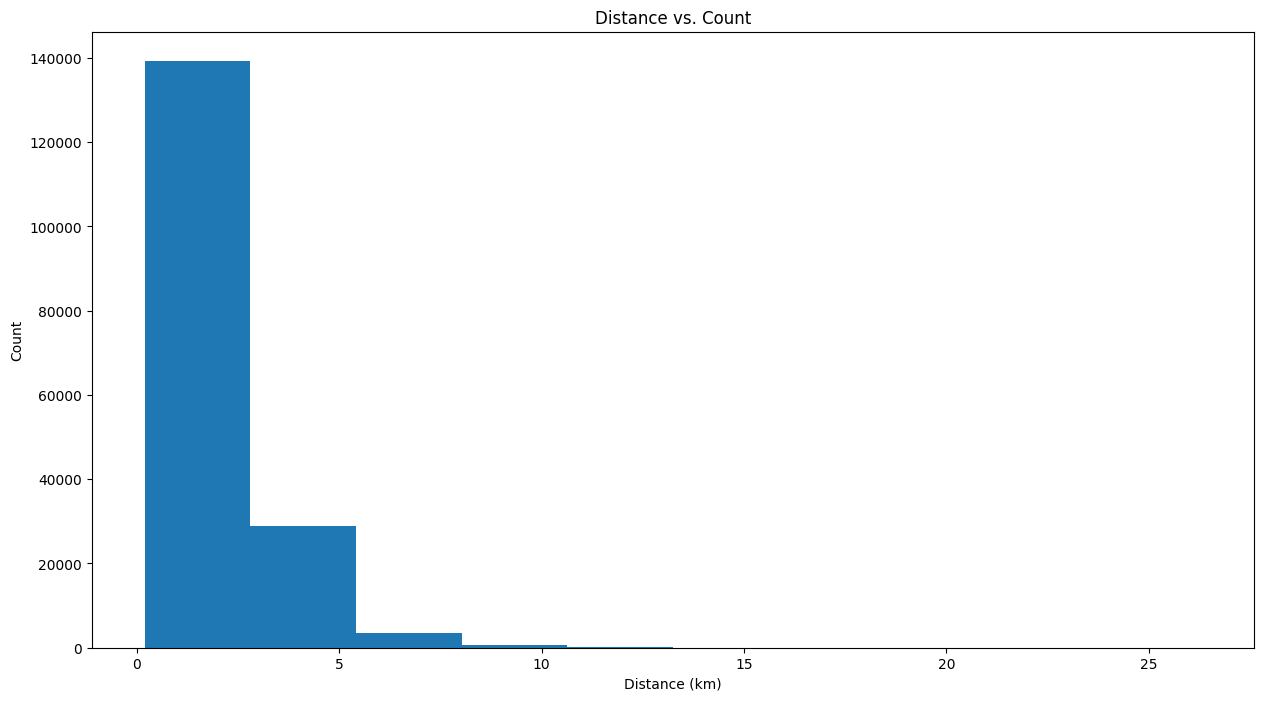

In [260]:
# Create histogram for distances
plt.figure(figsize=(15,8))
plt.hist(filtered_df["distance_km"])
plt.title('Distance vs. Count')
plt.xlabel('Distance (km)')
plt.ylabel('Count')

As we see in the plot, more people tend to bike shorter distances of less than 5 km because city bikes are primarily used for short commutes.

### Some Interesting Data Cleaning: Ranking
Let's now create a new column, data point, called rank. This data point will represent the frequency of a start or end station being the destination across all observations. So, a higher rank for a start station indicates more people start at that station then others, while low rank means less people begin at that station. The same applies for the end station. This rank system is an example of modifying our data to be a data point that is usable. We can't really pass in string values, such as the station names, into the machine learning model. Therefore, transforming it into an integer value, such as rank, can help make it useful.

*What other data points or ways do you think we can use the graph above?*

In [261]:
# Rank start stations based on occurrences
start_station_rank = filtered_df['start_station_name'].value_counts().rank(ascending=False, method='min')

# Rank stop stations based on occurrences
end_station_rank = filtered_df['end_station_name'].value_counts().rank(ascending=False, method='min')

# Assign ranks to start and stop stations
filtered_df['start_station_rank'] = filtered_df['start_station_name'].map(start_station_rank)
filtered_df['end_station_rank'] = filtered_df['end_station_name'].map(end_station_rank)

In [262]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,2024-02-25 19:14:16,2024-02-26 00:00:50,14th & V St NW,13th & U St NW,38.917709,-77.031844,38.916936,-77.029631,286.566667,True,False,0.209854,0.043938,6.0,51.0
1,2024-02-10 13:55:29,2024-02-10 18:53:54,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.416667,False,False,0.282017,0.056703,48.0,49.0
2,2024-02-26 09:58:42,2024-02-26 14:27:35,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,268.883333,False,False,0.314635,0.070209,355.0,336.0
3,2024-02-03 21:26:55,2024-02-04 00:21:16,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,174.350000,True,False,0.214356,0.073768,45.0,67.0
4,2024-02-16 15:38:29,2024-02-16 18:12:20,22nd & I St NW / Foggy Bottom,New Hampshire Ave & 24th St NW,38.900880,-77.048911,38.901755,-77.051084,153.850000,False,False,0.211721,0.082569,62.0,76.0


In [263]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,2024-02-25 19:14:16,2024-02-26 00:00:50,14th & V St NW,13th & U St NW,38.917709,-77.031844,38.916936,-77.029631,286.566667,True,False,0.209854,0.043938,6.0,51.0
1,2024-02-10 13:55:29,2024-02-10 18:53:54,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.416667,False,False,0.282017,0.056703,48.0,49.0
2,2024-02-26 09:58:42,2024-02-26 14:27:35,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,268.883333,False,False,0.314635,0.070209,355.0,336.0
3,2024-02-03 21:26:55,2024-02-04 00:21:16,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,174.350000,True,False,0.214356,0.073768,45.0,67.0
4,2024-02-16 15:38:29,2024-02-16 18:12:20,22nd & I St NW / Foggy Bottom,New Hampshire Ave & 24th St NW,38.900880,-77.048911,38.901755,-77.051084,153.850000,False,False,0.211721,0.082569,62.0,76.0


After creating new columns for data points, based off of some the existing data, we can drop the columns which cannot really be used for our machine learning model.

In [264]:
# Drop the start and end station columns
filtered_df.drop(["start_station_name", "end_station_name"], axis=1, inplace=True)

In [265]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,2024-02-25 19:14:16,2024-02-26 00:00:50,38.917709,-77.031844,38.916936,-77.029631,286.566667,True,False,0.209854,0.043938,6.0,51.0
1,2024-02-10 13:55:29,2024-02-10 18:53:54,38.908735,-77.029779,38.910674,-77.031880,298.416667,False,False,0.282017,0.056703,48.0,49.0
2,2024-02-26 09:58:42,2024-02-26 14:27:35,38.803124,-77.040363,38.804718,-77.043363,268.883333,False,False,0.314635,0.070209,355.0,336.0
3,2024-02-03 21:26:55,2024-02-04 00:21:16,38.900722,-77.046442,38.900880,-77.048911,174.350000,True,False,0.214356,0.073768,45.0,67.0
4,2024-02-16 15:38:29,2024-02-16 18:12:20,38.900880,-77.048911,38.901755,-77.051084,153.850000,False,False,0.211721,0.082569,62.0,76.0


In [266]:
# Drop time columns as we already have the calculated time duration column
filtered_df.drop(["started_at", "ended_at"], axis = 1, inplace=True)

# Drop the longitude and latitude measurements since we have our calculated distance column
filtered_df.drop(["start_lat", "start_lng", "end_lat", "end_lng"], axis = 1, inplace=True)

# Print out top of table to check
filtered_df.head()

,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,286.566667,True,False,0.209854,0.043938,6.0,51.0
1,298.416667,False,False,0.282017,0.056703,48.0,49.0
2,268.883333,False,False,0.314635,0.070209,355.0,336.0
3,174.350000,True,False,0.214356,0.073768,45.0,67.0
4,153.850000,False,False,0.211721,0.082569,62.0,76.0


## Part 3: Model training and testing
Finally, we've reached the fun part of the tutorial, the part where we actually do the interesting stuff: model training and testing. Now, there are so many different machine learning models, how do we decide which one to use?

First, we need to decide if our problem is a regression or classfication problem. In our case, it is a classification problem, since we are trying to predict whether the bike used was electric or classic. Based on what your problem is, there are different algorithms you can use. In order to decide from here, you need to understand the algorithms, as each one has its advantages and disadvantages. But, this process may just be trial and error by testing a number of different machine learning algorithms. 

To truly understand each algorithm would be overwhelming for this tutorial, however, we will provide external links for if you want to learn more. What's important is that you get a basic understanding of each algorithm that we use in this tutorial, as well as, how we are analyzing or scoring its performance for predicting the metric we want. Feel free to play around and experiment with some of the code provided.

The goal of model training and testing is to create a model, which can accurately predict the outcome.

For this part we used, [Scikit-Learn](https://scikit-learn.org/stable/). This is a very useful tool when it comes to predictive data analysis when coding in Python.

<center><img src="https://imgs.xkcd.com/comics/machine_learning.png"></center>

### Splitting into Training and Testing Set
First, we need to divide our data into training and testing. We will need to define our dependent variable, or the variable that we are predicting, which is of type bike. Then, we will split our dataset accordingly. A common ratio for splitting is 70% training and 30% testing, but it is often determined by a variety of factors, such as model complexity, size of dataset, and also the algorithm to be used on it. In our case, let's divide our training and testing by 80% and 20% respectively.

In [267]:
from sklearn.model_selection import train_test_split

# Drop average speed here becuase it was included for data analysis and identifying bad sensor data. Can't use
# a variable that was created based on the dependent variable as an independent variable
X = filtered_df.drop(["rideable_type_electric_bike", "average_speed"], axis=1)
y = filtered_df['rideable_type_electric_bike']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standard Scaler
Next, let's standardize and scale our data. Standard scaling ensures all features are on a similar scale by transforming them to have a mean of 0 and a standard deviation of 1. This prevents features with larger values from dominating the hypothesis function during the training process. Standard scaling allows all features to contribute equally, but it does not necessarily mean each feature will be weighted the same in the final model. The learned weights can still vary based on the patterns in the data.

In [268]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Machine Learning Models/Methods
Below, we begin implementing different machine learning algorithms and methods for making predictions for our data. Look through them, and try to mess around with the code in order to understand the general idea of the algorithms. We've also provided external links to learn more about these algorithms further below.

### Random Forest

In [269]:
from sklearn.ensemble import RandomForestClassifier

In [270]:
# create a RandomForest Classifier
rf = RandomForestClassifier()

In [271]:
# fit the random forest classifier with the training data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [272]:
# create predictions on the test data
predictions = rf.predict(X_test_scaled)

### Classification Report and Confusion Matrix
#### Evaluating Model Performance

In [273]:
from sklearn.metrics import classification_report, confusion_matrix

In [274]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.73      0.80      0.76     17071
        True       0.78      0.71      0.74     17421

    accuracy                           0.75     34492
   macro avg       0.75      0.75      0.75     34492
weighted avg       0.75      0.75      0.75     34492



In [275]:
print(confusion_matrix(y_test, predictions))

[[13586  3485]
 [ 5060 12361]]


### Grid Search CV w/ Random Forest
#### Try and Improve the Model Accuracy from 75%

In [74]:
from sklearn.model_selection import GridSearchCV

In [133]:
# Define the parameter grid you want to search over
param_grid = {
    'n_estimators': [100, 400],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 2, 8],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2]
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Initialize GridSearchCV with the parameter grid and RandomForestClassifier
# Uses rf model, tries different parmas in param_grid, uses 5 fold cross validation, all the cpu power
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score found
print("Best score:", grid_search.best_score_)

# get the predictions
predictions = grid_search.predict(X_test)

/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warn

Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best score: 0.7478940209547513


### Logistic Regression

In [277]:
from sklearn.linear_model import LogisticRegression

In [278]:
# creating a logistic regression model
lr = LogisticRegression()

In [279]:
# fitting the model on training data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [280]:
# predictions
y_pred = lr.predict(X_test_scaled)

##### Looking at the metrics

In [281]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.65      0.70      0.67     17071
        True       0.68      0.63      0.65     17421

    accuracy                           0.66     34492
   macro avg       0.66      0.66      0.66     34492
weighted avg       0.66      0.66      0.66     34492



In [282]:
print(confusion_matrix(y_test, y_pred))

[[11913  5158]
 [ 6532 10889]]


In [283]:
from sklearn.preprocessing import MinMaxScaler

In [284]:
# MinMax Scaler is better for ANN scales values between 0 and 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Sequential Model (Artificial Neural Network) - Fully-Connected Layers

In [285]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [286]:
# Initialize the model
model = Sequential()

# Add layers
# A dense is a fully-connected layer with units defining the number of neurons
# and activation defining the output of these neurons
model.add(Dense(units=20, activation='relu'))
# Randomly drops 10% of neurons in that layer to prevent overfitting
model.add(Dropout(0.1))
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=5, activation='relu'))
model.add(Dropout(0.1))
# output layer is sigmoid because it is a binary problem
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model (binary_crossentropy loss for binary classification)
model.compile(loss='binary_crossentropy', optimizer='adam')

In [287]:
# printing model summary and layers
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Early Stopping
Here we are optimizing our model above.

In [288]:
from tensorflow.keras.callbacks import EarlyStopping

In [289]:
# implementing early stopping prevents overfitting by monitoring that the loss doesn't increase for 10
# continuous epochs
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10, verbose = 1)

In [290]:
# Fitting model
# Default run is using 800 epochs, and validation_data is used with early_stop to monitor test loss
model.fit(X_train, y_train, 
          epochs = 800,
         validation_data=(X_test, y_test),
         verbose = 1, 
         callbacks=[early_stop])

Epoch 1/800
4312/4312 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.6781 - val_loss: 0.5919
Epoch 2/800
4312/4312 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.6101 - val_loss: 0.5768
Epoch 3/800
4312/4312 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5926 - val_loss: 0.5688
Epoch 4/800
4312/4312 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5859 - val_loss: 0.5687
Epoch 5/800
4312/4312 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5841 - val_loss: 0.5645
Epoch 6/800
4312/4312 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5829 - val_loss: 0.5626
Epoch 7/800
4312/4312 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.5808 - val_loss: 0.5623
Epoch 8/800
4312/4312 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5802 - val_loss: 0.5640
Epoch 9/800
4312/4312 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5803 - val_loss: 0.5624
Epoch 10/800
4312/4312 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5788 - val_loss: 0.5633
Epoch 11/800
4312/4312 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5787 - val_loss: 0.5690
Epoch 12/800
4312/4

Text(0, 0.5, 'Loss')

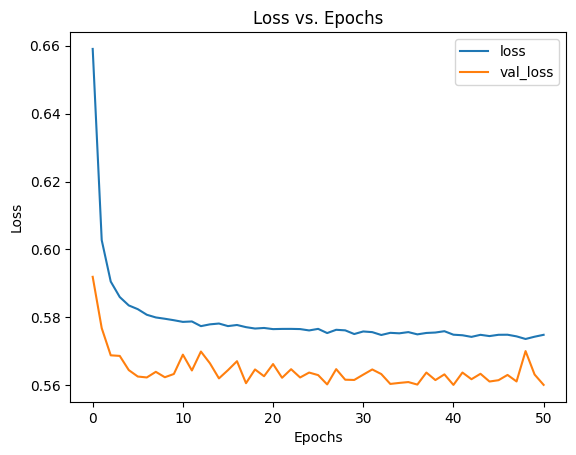

In [291]:
# plot the loss of training and test
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [292]:
# calculate the predictions
prediction = model.predict(X_test)

1078/1078 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step


In [299]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 20)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,004 (3.93 KB)

This is how our updated model looks like after training.

#### Looking at the metrics

In [298]:
# Since the predictions give us probabilities from the sigmoid function,
# we need to convert these probabilities into the appropriate classification.
prediction = [1 if x >= 0.5 else 0 for x in prediction]

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.68      0.78      0.73     17071
        True       0.75      0.64      0.69     17421

    accuracy                           0.71     34492
   macro avg       0.72      0.71      0.71     34492
weighted avg       0.72      0.71      0.71     34492



In [297]:
print(confusion_matrix(y_test, prediction))

[[13367  3704]
 [ 6230 11191]]


### References
Here are some links to learn more about some of the algorithms above:
- __[Learn more about ML Algorithms](https://ml-cheatsheet.readthedocs.io/en/latest/)__
- __[Learn more about Random Forest](https://ml-cheatsheet.readthedocs.io/en/latest/classification_algos.html#random-forests/)__
- __[Learn more about Logistic Regression](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)__
- __[Learn more about Neural Networks](https://ml-cheatsheet.readthedocs.io/en/latest/nn_concepts.html)__
- __[Learn more about Distance Formulas](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)__
- __[Learn about Confusion Matrix](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)__

## Part 4: Interpretation of Results
As a data scientist, it is important to interpret your results, in order to communicate the significance or maybe insignificance of what you found. Regardless, you will need to report and share with your team, making the numbers make sense. For a more specific case, we would need to interpret the results in terms of the problem or question at hand. So, for this tutorial, our original question was: ***why and when do people in Washington D.C use electric bikes over normal bikes?*** How can we use the results we found to help answer this question?

It's important to understand that sometimes, our results don't provide a clear answer. But, it will always provide us some guidance or insight into our question/answer. Looking at all the models used above, we can predict with about 75% accuracy the type of bike used during a bike ride given our features. As mentioned earlier in our tutorial, building a model may provide us with some guidance. However, in the current state of machine learning, for many algorithms, we aren't quite sure how they work. It's like a black box, where we input data, it does something in the box, and gives us an output. But, using the accuracy, precision, recall, F1 score, and other metrics, we can determine if the features used can help us predict which bike type was used.

However, this doesn't mean we settle with our results. We can take a look and consider changing values, adapting our models, or doing more. Let's take a look. Interpreting the output from our models, or more specifically from the confusion matrixes created, it can be seen that:
* The Random Forest model has a balance between Type 1 (3485) and Type 2 (5060) errors. It has an accuracy of 75%, and after hypertuning using GridSearch, it still has an accuracy of 75%.
* The Logistic Regression model has a balance between Type 1 (5158) and Type 2 (6532) errors. It has an accuracy of 66%.
* The Artificial Neural Network model, however, has a lot more Type 2 (6230) than Type 1 (3704) errors. It has an accuracy of 71%.

It could be useful to figure out how to minimize the Type 2 errors in the ANN and how to overall reduce errors for the other two. To do this some of our insights came from how we processed the data. Type 1 is classifying it as electric when it is not vs Type 2 which is predicting not electric when it is. ANN was much worse at Type 2, but LR and RF hadd a decent balance between the two. Both the Type 1 and Type 2 errors are useful metrics in determining how you want to optimize your models, to reduce either error.

The best that any of our models could manage was 0.75 accuracy and a very similar F1 score. This came from our Random Forest model. We tried to improve on our accuracy by using Grid Search CV with our forest model. However, for our Grid Search parameter, changing the parameters (certain inputs to the algorithm) didn't do much to improve the accuracy of our predictions. This is an indication that there needs to be more features or data collected, as the data that we have now, is not the best predictors for our bike types. Additionally, this idea is supported by the fact that both the Logistic Regression and Artificial Neural Network models didn't perform well on the data either. Among those two models, the worse one was Logistic Regression with an accuracy of 0.66, and a very similar F1 score. ANN fared slightly better, yielding a 0.71 accuracy and a marginally higher F1 score. This tells us that the model selection isn't the problem. Parameter tuning wasn't an issue either as a Grid Search was used. There were five relevant features, and the rank was created based on our feature tuning. Additionally, further feature analysis to get more information such as weather, number of bikes at a station, and elevation gain between stations could provide useful insight to have better predictions. So, we should restart the process of the data science lifecycle once again! But that's alright, that's just part of the data science lifecycle.

Next Steps: Collect more data and go through the data life cycle process again, and keep repeating the experiment to improve the model.

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/Top-6-data-collection-methods-700x545.png"></center>

## Conclusion
Our models weren't quite as robust as we wanted. But like we said, that's ok. We were still able to notice patterns in the data, clean the data, test hypotheses and make predictions about what types of bikes people were riding in DC. We're not ready to recommend any major poilcy decisions based on our exploration, so it's time to go back to the beginning of the process.

We hope you have learned a lot from this tutorial, including the individual steps of the data science lifecycle:

1. Data collection
3. Data processing
4. Exploratory analysis and Data visualization
5. Model analysis and testing
6. Interpretation of results

Beginning to understand the lifecycle is the beginning to learning more. As a data scientist, you aren't just processing and spitting out data. You are solving real world problems. Data science is used in politics, advertising, sports, scientific studies, and so much more. We hope that through this tutorial, we have inspired you to learn more. So, go on and make a difference!

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/Data-collection-and-lead-generation-700x545.png"></center>